Paso 1: Entendiendo el Problema
El objetivo principal es analizar si los cines son rentables hoy en día, evaluando tendencias de asistencia, recaudación y la competencia con plataformas como Netflix y HBO. Vamos a construir un modelo de Machine Learning que prediga el impacto de diversas variables sobre la rentabilidad de los cines y que identifique patrones ocultos usando técnicas de clustering.

Problema de negocio: Determinar si los cines son rentables en la actualidad, teniendo en cuenta la competencia de las plataformas de streaming.

Problema técnico: Desarrollar un modelo de ML supervisado y/o no supervisado para analizar tendencias en asistencia, recaudación y competencia.

Paso 2: Exploración de Datos (EDA)
Cargar y Ver el Dataset:

El dataset incluye columnas como Ticket_ID, Age, Ticket_Price, Movie_Genre, Seat_Type, Number_of_Person, Purchase_Again, y las nuevas columnas como Año, Espectadores (millones), Recaudación (millones de euros) y Precio medio de la entrada (euros).

Limpieza de Datos:

Identificar y manejar valores nulos o duplicados.

Convertir variables categóricas (como Movie_Genre o Seat_Type) a representaciones numéricas utilizando técnicas como One-Hot Encoding o Label Encoding.

Asegurarse de que las columnas Año, Espectadores, y Recaudación estén en el formato correcto para análisis.

Análisis Inicial:

Gráficos para explorar la relación entre el Año y las columnas de Recaudación y Espectadores.

Distribución de precios (Ticket_Price) según género y tipo de asiento.

Paso 3: División de Datos
Dividiremos el dataset en conjuntos de entrenamiento y prueba, especialmente para el análisis supervisado. Si vamos a implementar clustering, normalizaremos las variables relevantes.

Paso 4: Construcción de Modelos
Modelos Supervisados
Probaremos modelos como:

Regresión Lineal para predecir recaudación basada en datos anuales.

Random Forest para identificar las características más predictivas.

Métricas:

MAE (Error Absoluto Medio), RMSE (Raíz del Error Cuadrático Medio) y R² para evaluar los modelos.

Modelos No Supervisados
Implementaremos K-Means o DBSCAN para agrupar los cines según:

Rentabilidad.

Patrón de compra.

Evaluación:

Silueta o inercia para medir la calidad de los clusters.

Paso 5: Exportación del Modelo
Guardaremos el modelo final en formato pickle, joblib o h5 (para modelos de Deep Learning).

import joblib

# Guardar el modelo final
joblib.dump(modelo_final, 'src/models/modelo_final.pkl')
print("Modelo guardado en src/models/modelo_final.pkl")


Paso 6: Visualización de Resultados
Crearemos gráficos claros y atractivos:

Tendencias en la asistencia al cine frente a las plataformas de streaming.

Clusters generados en el análisis no supervisado.

Comparación entre las predicciones del modelo y los valores reales.

Paso 7: Documentación Final
Notebook Final
Debe incluir los pasos ordenados y funcionales, guardado en src/results_notebook/notebook_final.ipynb.

Presentación
Introducción: ¿Por qué este problema es importante?

Metodología: Resumen de los pasos seguidos.

Resultados: Gráficos clave y métricas.

Conclusiones: Impacto de Netflix y HBO, predicciones, recomendaciones para los cines.

Acciones Futuras: Mejoras posibles y aplicaciones prácticas.

Texto para la Presentación en Vídeo
Introducción: "El cine es una experiencia cultural inigualable, pero desde el auge de plataformas como Netflix y HBO, su rentabilidad está en constante desafío. Este proyecto explora si los cines son aún sostenibles económicamente."

Metodología: "Para ello, utilizamos un enfoque de Machine Learning supervisado y no supervisado, basado en datos de ventas de entradas, recaudación y competencia con plataformas de streaming."

Resultados: "Nuestro modelo supervisado predice las recaudaciones con un error promedio del XX% y los clusters no supervisados identifican segmentos clave de rentabilidad."

Conclusiones: "Los cines enfrentan un futuro desafiante pero prometedor si aprovechan estrategias como precios dinámicos y eventos únicos."

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# Datos obtenidos del Ministerio de Cultura y de distintos análisis periodísticos (El País, Cope)

# Definir los datos en un diccionario
data = {
    "Año": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Recaudación": [601375693, 597143256, 588675481, 628076776, 174153477, 252069251, 376814060, 491555176, 479518962],
    "Espectadores": [100270569, 99132198, 97993827, 105938534, 28876970, 41499889, 59995576, 75472359, 71437087],
    "Fiesta del cine": [2600000, 2300000, 1800000, 2350000, None, 1200000, 704977, 1198062, 1394058],
    "Pantallas": [3545, 3585, 3578, 3674, 3585, 3633, 3650, 3609, 3464],
    "Gasto medio/espectador": [5.93, 5.93, 5.93, 5.86, 5.99, 6.04, 6.19, 6.42, 6.24],
    "Frecuencia": [2.2, 2.2, 2.09, 2.23, 0.56, 0.86, 1.24, 1.6, 1.52],
    "Nº Películas": [1797, 1869, 1951, 1862, 1586, 2105, 2543, 2450, 2357],
    "Netflix espectadores*": [900000, 1163000, 1400000, 2550000, 3900000, 5256064, 6000000, 7620000, 10200000],
    "Netflix precio": [7.99, 7.99, 7.99, 8.99, 8.99, 11.99, 11.99, 12.99, 13.99],
    "HBO espectadores*": [414000, 538000, 1000000, 1290000, 1800000, 2100000, 2600000, 4000000, 34260000],
    "HBO precio": [7.99, 7.99, 8.99, 8.99, 8.99, 8.99, 8.99, 8.99, 9.99]
}

# Crear un DataFrame guardar como CSV
df = pd.DataFrame(data)
df.to_csv('./data/cine_dataset.csv', index=False)

# Cargar datasets
cine_dataset = pd.read_csv("./data/cine_dataset.csv")
cinema_hall_ticket_sales = pd.read_csv("./data/cinema_hall_ticket_sales.csv")

# Renombrar columnas (a español) de cinema_hall_ticket_sales
cinema_hall_ticket_sales.rename(columns={
    'Age': 'Edad',
    'Movie_Genre': 'Género película',
    'Seat_Type': 'Asiento',
    'Number_of_Person': 'Nº de personas',
    'Purchase_Again': 'Compró de nuevo'
}, inplace=True)

# Eliminar columna no necesaria
cinema_hall_ticket_sales.drop(columns=['Ticket_Price'], inplace=True)

# Fusionar datasets
cine_dataset['key'] = range(len(cine_dataset))
cinema_hall_ticket_sales['key'] = range(len(cinema_hall_ticket_sales))
combined_dataset = pd.merge(cine_dataset, cinema_hall_ticket_sales, on="key", how="inner")
combined_dataset.drop(columns=['key'], inplace=True)
combined_dataset.to_csv("project_break.csv", index=False)

# Cargar dataset combinado
df = pd.read_csv("./data/project_break.csv")

# Limpiar valores NaN y ajustar tipos
df['Fiesta del cine'] = df['Fiesta del cine'].fillna(0).astype(int)

# Ajustar valores (cambiar Alone a 1)
df['Nº de personas'] = df['Nº de personas'].replace('Alone', 1)

# Crear variables
df['Pandemic_Impact'] = df['Año'].apply(lambda x: 1 if x == 2020 else 0)
df['Streaming_Impact'] = df['Año'].apply(lambda x: 1 if x >= 2016 else 0)
df['Cost_Per_Spectator'] = df['Recaudación'] / df['Espectadores']

# Codificar variables categóricas
df = pd.get_dummies(df, columns=['Género película', 'Asiento'], drop_first=True)

# Eliminar columnas innecesarias
df = df.drop(columns=['Ticket_ID'])

# Dataset listo para análisis
print("Dataset enriquecido y preparado para análisis.")




Dataset enriquecido y preparado para análisis.


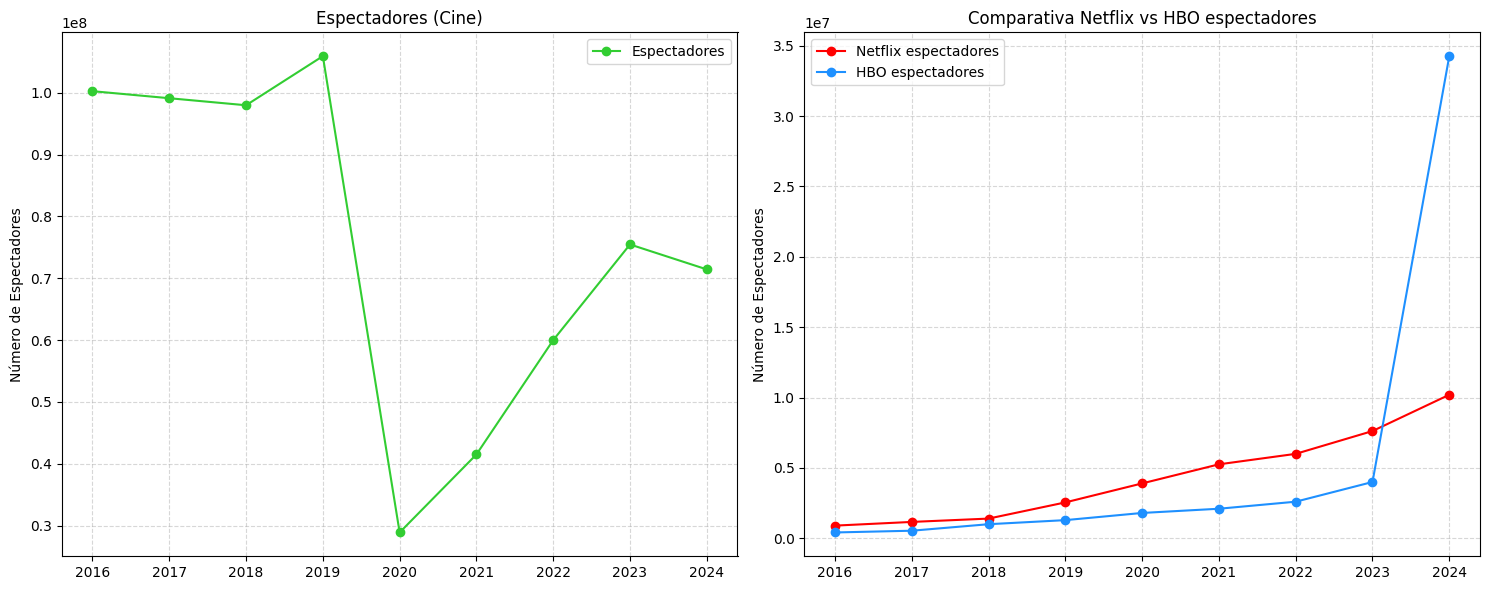

In [ ]:
# Crear una figura con dos subgráficas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ----------------------------------
# Gráfica Línea para 'Espectadores'
# ----------------------------------
axes[0].plot(df["Año"], df['Espectadores'], marker='o', linestyle='-', color='#32CD32', label='Espectadores')
axes[0].set_title('Espectadores (Cine)')
axes[0].set_xlabel('')
axes[0].set_ylabel('Número de Espectadores')
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend()


# -------------------------------------------------------------
# # Gráfica entre 'Netflix espectadores*' y 'HBO espectadores'
# -------------------------------------------------------------
axes[1].plot(df["Año"], df['Netflix espectadores*'], marker='o', linestyle='-', color='red', label='Netflix espectadores')
axes[1].plot(df["Año"], df['HBO espectadores*'], marker='o', linestyle='-', color='#1E90FF', label='HBO espectadores')
axes[1].set_title('Comparativa Netflix vs HBO espectadores')
axes[1].set_xlabel('')
axes[1].set_ylabel('Número de Espectadores')
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].legend()

# Ajustar el espaciado 
plt.tight_layout()
plt.show()


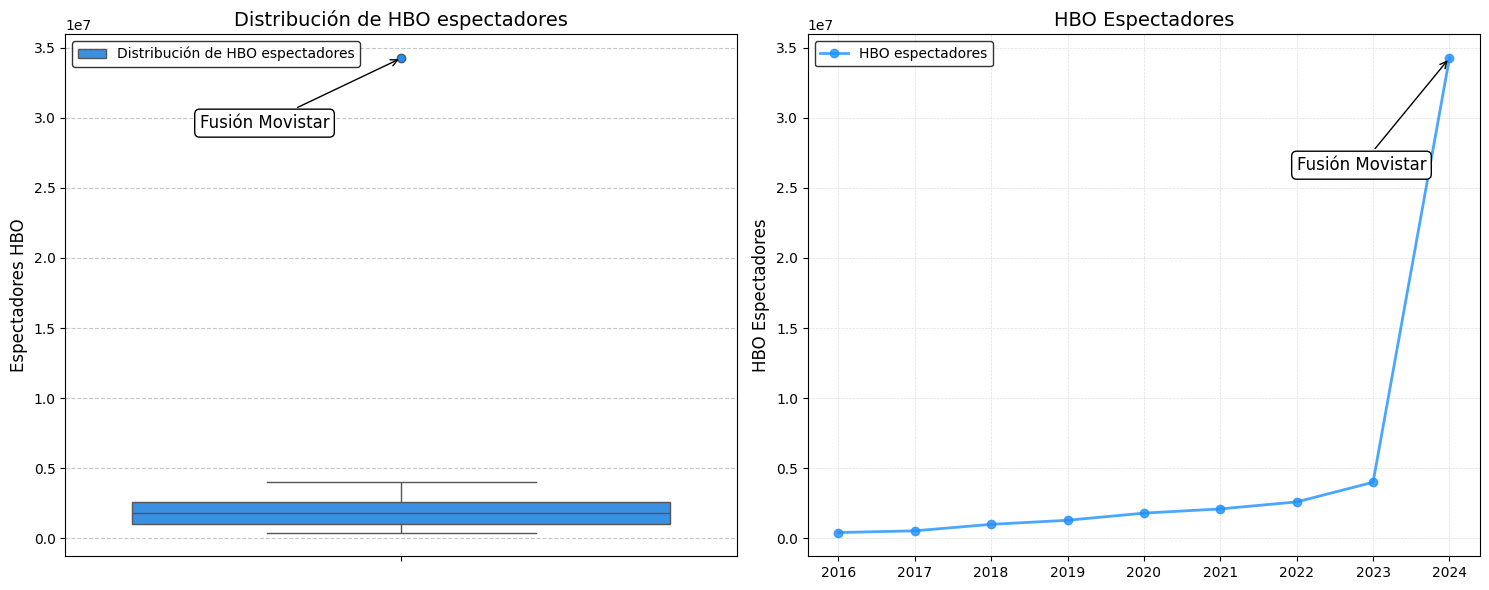

In [ ]:
# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# -------------------------------
# Boxplot para 'HBO espectadores'
# -------------------------------
sns.boxplot(y=df['HBO espectadores*'], color='#1E90FF', ax=axes[0], flierprops=dict(markerfacecolor='#1E90FF', marker='o'))
axes[0].set_title('Distribución de HBO espectadores', fontsize=14)
axes[0].set_ylabel('Espectadores HBO', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].annotate('Fusión Movistar',
                 xy=(0, df[df['Año'] == 2024]['HBO espectadores*'].values[0]),
                 xytext=(-0.3, df[df['Año'] == 2024]['HBO espectadores*'].values[0] - 5000000),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
axes[0].legend(['Distribución de HBO espectadores'], loc='upper left', fontsize=10, frameon=True, facecolor='white', edgecolor='black')

# -----------------------------------------
# Gráfico de líneas para 'HBO espectadores'
# -----------------------------------------
axes[1].plot(df['Año'], df['HBO espectadores*'], marker='o', color='#1E90FF', linestyle='-', linewidth=2, alpha=0.8, label='HBO espectadores')
axes[1].set_title("HBO Espectadores", fontsize=14)
axes[1].set_xlabel("")
axes[1].set_ylabel("HBO Espectadores", fontsize=12)
axes[1].grid(alpha=0.4, linestyle='--', linewidth=0.5)
axes[1].annotate('Fusión Movistar',
                 xy=(2024, df[df['Año'] == 2024]['HBO espectadores*'].values[0]),
                 xytext=(2022.0, df[df['Año'] == 2024]['HBO espectadores*'].values[0] - 8000000),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
axes[1].legend(['HBO espectadores'], loc='upper left', fontsize=10, frameon=True, facecolor='white', edgecolor='black')

# Ajustar los espacios entre los subplots
fig.tight_layout()
plt.show()


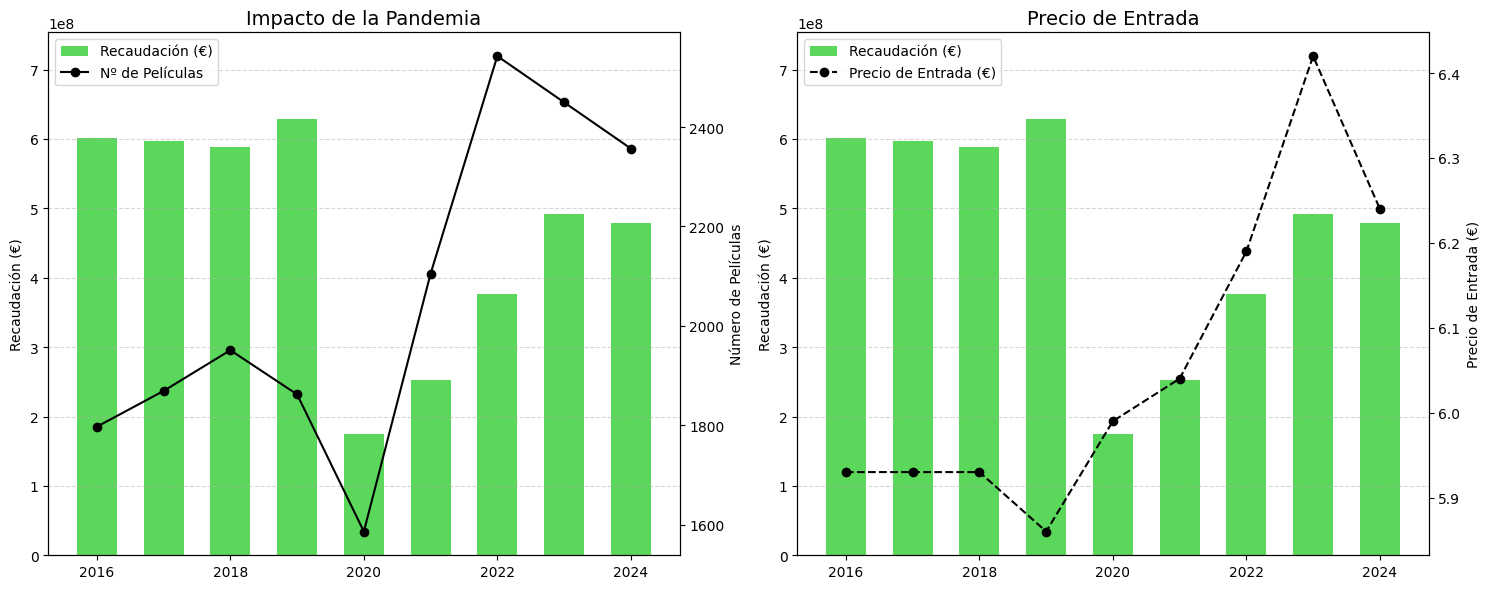

In [172]:
# Crear la figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# -----------------------------------------------
# Gráfico para Recaudación y Número de Películas
# -----------------------------------------------
axes[0].bar(df['Año'], df['Recaudación'], color='#32CD32', label='Recaudación (€)', alpha=0.8, width=0.6)
axes[0].set_ylabel("Recaudación (€)", color='black')
axes[0].tick_params(axis='y', labelcolor='black')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
axes[0].set_ylim(0, df['Recaudación'].max() * 1.2)
axes[0].set_title("Impacto de la Pandemia", fontsize=14)

ax2 = axes[0].twinx()
ax2.plot(df['Año'], df['Nº Películas'], color='black', marker='o', linestyle='-', linewidth=1.5, label='Nº de Películas')
ax2.set_ylabel("Número de Películas", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Leyenda 
lines1, labels1 = axes[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
axes[0].legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10, frameon=True)

# ---------------------------------------------
# Gráfico para Recaudación y Precio de Entrada
# ---------------------------------------------
axes[1].bar(df['Año'], df['Recaudación'], color='#32CD32', label='Recaudación (€)', alpha=0.8, width=0.6)
axes[1].set_ylabel("Recaudación (€)", color='black')
axes[1].tick_params(axis='y', labelcolor='black')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)
axes[1].set_ylim(0, df['Recaudación'].max() * 1.2)
axes[1].set_title("Precio de Entrada", fontsize=14)

ax3 = axes[1].twinx()
ax3.plot(df['Año'], df['Gasto medio/espectador'], color='black', marker='o', linestyle='--', linewidth=1.5, label='Precio de Entrada (€)')
ax3.set_ylabel("Precio de Entrada (€)", color='black')
ax3.tick_params(axis='y', labelcolor='black')

# Leyenda 
lines3, labels3 = axes[1].get_legend_handles_labels()
lines4, labels4 = ax3.get_legend_handles_labels()
axes[1].legend(lines3 + lines4, labels3 + labels4, loc='upper left', fontsize=10, frameon=True)

# Ajustar diseño 
plt.tight_layout()
plt.show()


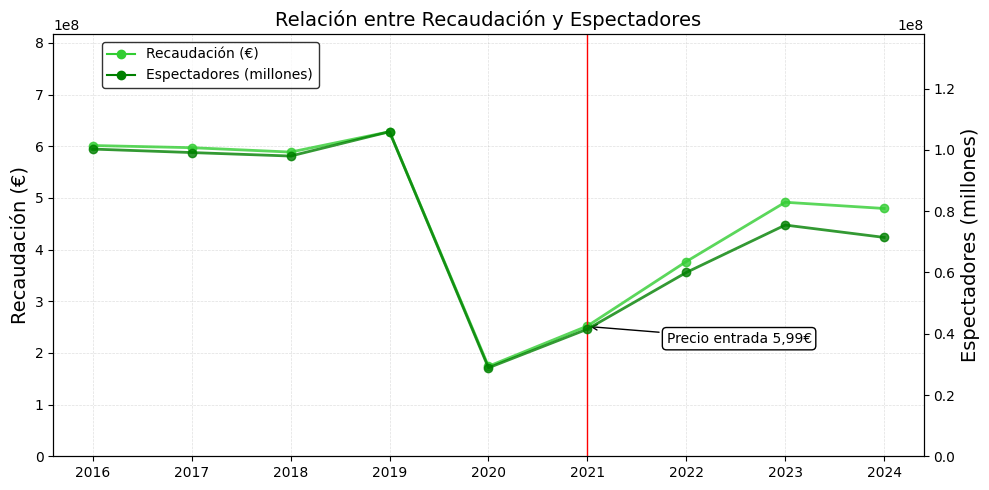

In [ ]:
# Crear la figura
fig, ax1 = plt.subplots(figsize=(10, 5))

# ----------------------------------------
# Gráfico para Recaudación y Espectadores
# ----------------------------------------
ax1.plot(df['Año'], df['Recaudación'], color='#32CD32', marker='o', linestyle='solid', label='Recaudación (€)', linewidth=2, alpha=0.8)
ax1.set_ylabel("Recaudación (€)", color='black', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(alpha=0.4, linestyle='--', linewidth=0.5)
ax1.set_ylim(0, df['Recaudación'].max() * 1.3)

ax2 = ax1.twinx()
ax2.plot(df['Año'], df['Espectadores'], color='green', marker='o', linestyle='solid', label='Espectadores (millones)', linewidth=2, alpha=0.8)
ax2.set_ylabel("Espectadores (millones)", color='black', fontsize=14)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, df['Espectadores'].max() * 1.3)

# Línea vertical
ax1.axvline(x=2021, color='red', linestyle='-', linewidth=1)

# Anotación para el precio de entrada en 2021
ax1.annotate(
    'Precio entrada 5,99€', 
    xy=(2021, df['Recaudación'].max() * 0.4), 
    xytext=(2021.8, df['Recaudación'].max() * 0.35), 
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1), 
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'), 
    fontsize=10, color='black'
)

# Leyenda 
handles = [
    plt.Line2D([0], [0], color='#32CD32', marker='o', label='Recaudación (€)'),
    plt.Line2D([0], [0], color='green', marker='o', label='Espectadores (millones)')
]
fig.legend(handles=handles, loc='upper left', bbox_to_anchor=(0.1, 0.92), frameon=True, fontsize=10, edgecolor='black')

# Título del gráfico
plt.title("Relación entre Recaudación y Espectadores", fontsize=14)

# Ajustar diseño y mostrar el gráfico
fig.tight_layout()
plt.show()


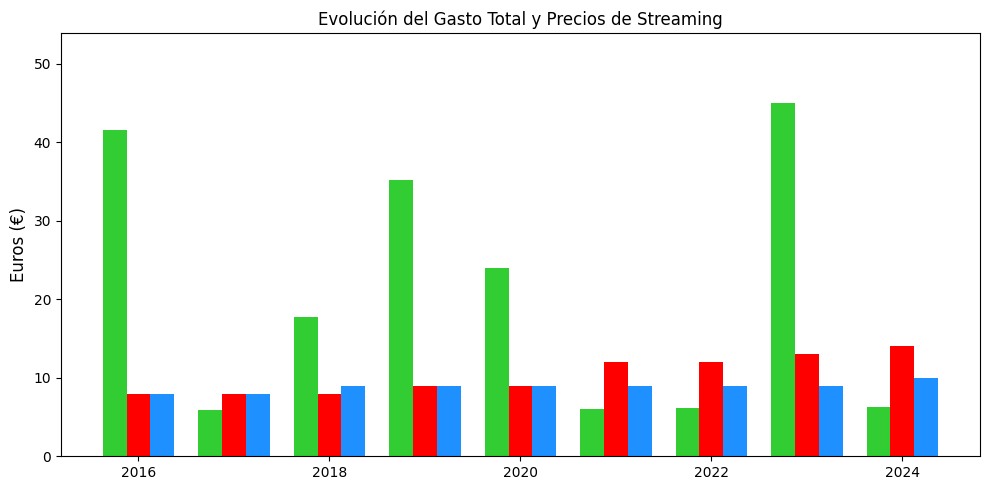

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
width = 0.25

# ------------------------------------------
# Gráfico para Gasto en Cine, Netflix y HBO
# ------------------------------------------
# Barras para gasto medio total, precio Netflix y precio HBO
plt.bar(df['Año'] - width, df['Gasto medio/espectador'] * df['Nº de personas'], width=width, label='Gasto medio total (Gasto medio x Nº de personas)', color='#32CD32')
plt.bar(df['Año'], df['Netflix precio'], width=width, label='Precio Netflix', color='red')
plt.bar(df['Año'] + width, df['HBO precio'], width=width, label='Precio HBO', color='#1E90FF')

# Etiquetas y diseño
plt.ylabel("Euros (€)", fontsize=12)
plt.title("Evolución del Gasto Total y Precios de Streaming", fontsize=12)

# Ajustar el eje Y
plt.ylim(0, max((df['Gasto medio/espectador'] * df['Nº de personas']).max(), df['Netflix precio'].max(), df['HBO precio'].max()) * 1.2)

# Ajustar diseño
plt.tight_layout()
plt.show()


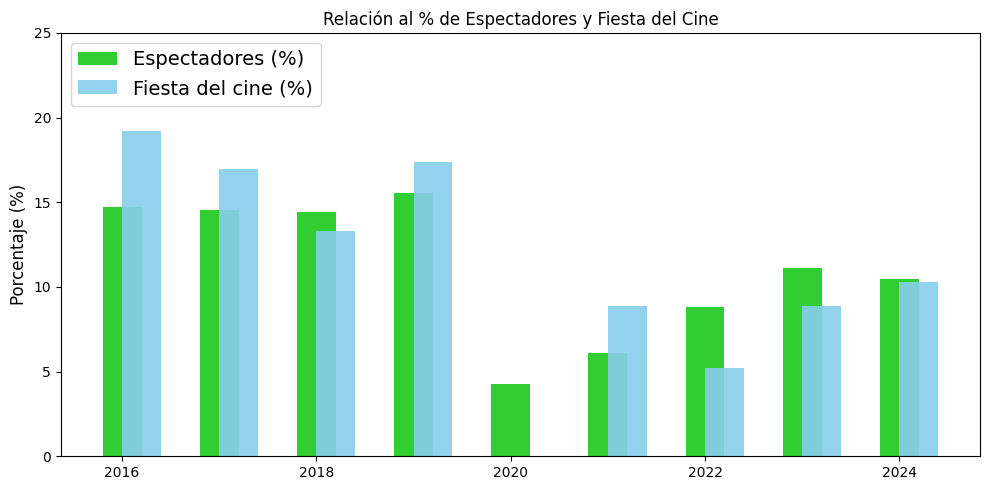

In [184]:
# ------------------------------------------------
# Gráfico para Espectadores y Fiesta del Cine (%)
# ------------------------------------------------
# Calcular porcentajes
df['Espectadores %'] = (df['Espectadores'] / df['Espectadores'].sum()) * 100
df['Fiesta del cine %'] = (df['Fiesta del cine'] / df['Fiesta del cine'].sum()) * 100

# Crear la figura
fig, ax1 = plt.subplots(figsize=(10, 5))

# Gráfica de barras para Espectadores
ax1.bar(df['Año'], df['Espectadores %'], color='#32CD32', width=0.4, label='Espectadores (%)')

# Gráfica de barras para Fiesta del cine
ax1.bar(df['Año'], df['Fiesta del cine %'], color='skyblue', alpha= 0.9, width=0.4, align='edge', label='Fiesta del cine (%)')

# Configurar el eje Y
ax1.set_ylim(0, 25)

# Estilo y diseño
ax1.set_ylabel("Porcentaje (%)", color='black', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')

# Títulos y leyenda
plt.title("Relación al % de Espectadores y Fiesta del Cine", fontsize=12)
ax1.legend(loc='upper left', fontsize=14)

# Ajustar diseño y mostrar el gráfico
fig.tight_layout()
plt.show()


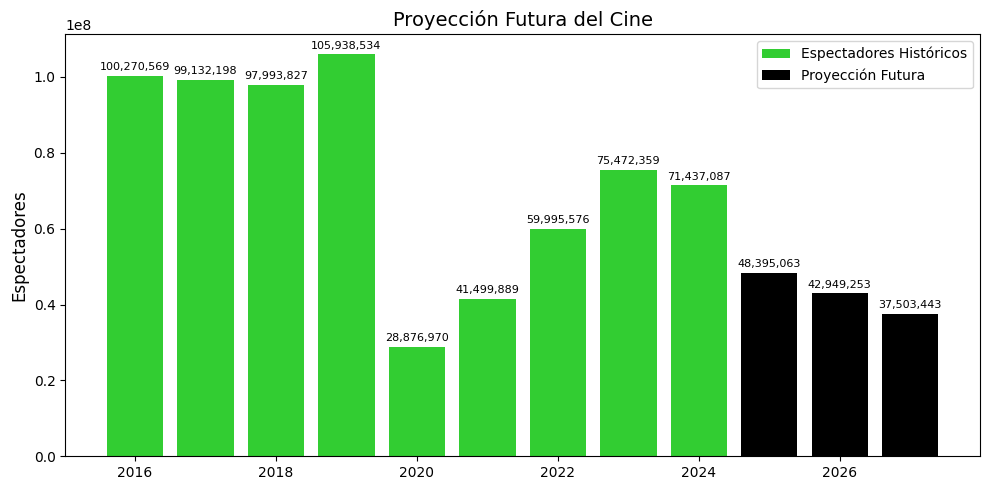

In [185]:
# -----------------------------
# Gráfica de Proyección Futura
# -----------------------------
# Crear el modelo de regresión lineal
model = LinearRegression()
X = df['Año'].values.reshape(-1, 1)
y = df['Espectadores'].values
model.fit(X, y)

# Predicción para los años futuros
años_futuros = np.array([2025, 2026, 2027]).reshape(-1, 1)
predicciones = model.predict(años_futuros)

# Crear la gráfica
plt.figure(figsize=(10, 5))
plt.bar(df['Año'], df['Espectadores'], color='#32CD32', label='Espectadores Históricos')
plt.bar(años_futuros.flatten(), predicciones, color='black', label='Proyección Futura')

# Añadir etiquetas a las barras
for i, value in enumerate(df['Espectadores']):
    plt.text(df['Año'].iloc[i], value + 1000000, f"{round(value):,}", ha='center', va='bottom', fontsize=8)
for i, value in enumerate(predicciones):
    plt.text(años_futuros.flatten()[i], value + 1000000, f"{round(value):,}", ha='center', va='bottom', fontsize=8)

# Etiquetas y diseño
plt.xlabel("", fontsize=12)
plt.ylabel("Espectadores", fontsize=12)
plt.title("Proyección Futura del Cine", fontsize=14)
plt.legend()

# Ajustar el gráfico
plt.tight_layout()
plt.show()


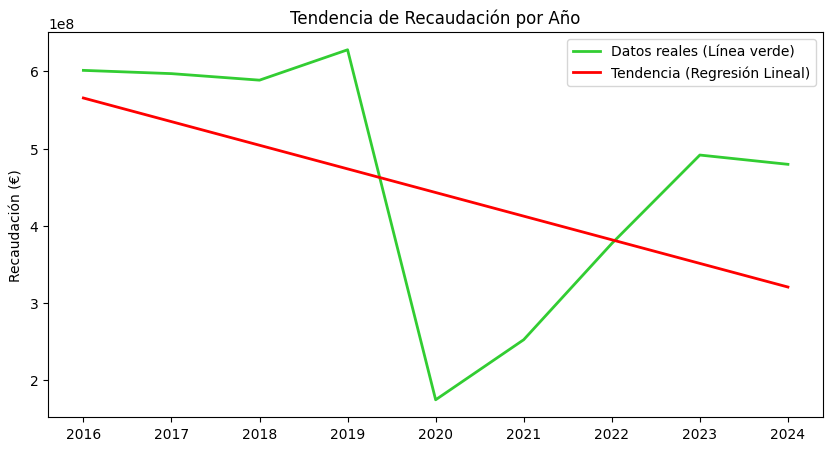

In [114]:
# Variables para regresión lineal
X = df[['Año']]
y = df['Recaudación']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo y entrenarlo
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predecir valores y graficar los resultados
y_pred = reg_model.predict(X_test)

plt.figure(figsize=(10, 5))

# Graficar la tendencia de los datos reales como una línea verde
plt.plot(X, y, color='#32CD32', linewidth=2, label='Datos reales (Línea verde)')

# Graficar la línea de regresión lineal
plt.plot(X, reg_model.predict(X), color='red', linestyle='-', linewidth=2, label='Tendencia (Regresión Lineal)')

# Configuración del gráfico
plt.xlabel("")
plt.ylabel("Recaudación (€)")
plt.title("Tendencia de Recaudación por Año")
plt.legend()
plt.show()


In [188]:


# ---------------------------------------------
# División de Datos para Problemas Supervisados
# ---------------------------------------------

# 1. Para la regresión: predecir 'Recaudación'
features_reg = ['Año', 'Espectadores', 'Pantallas', 'Gasto medio/espectador', 'Frecuencia', 'Nº Películas']
X_reg = df[features_reg]
y_reg = df['Recaudación']

from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
print("\nDimensiones conjuntos de regresión:")
print("Entrenamiento:", X_train_reg.shape, "Prueba:", X_test_reg.shape)



Dimensiones conjuntos de regresión:
Entrenamiento: (6, 6) Prueba: (3, 6)


In [189]:

# 2. Para la clasificación: predecir 'Compró de nuevo'

# Convertir 'Compró de nuevo' a binario
df['Compró de nuevo_bin'] = df['Compró de nuevo'].apply(lambda x: 1 if str(x).strip().lower()=='yes' else 0)
features_clf = ['Edad', 'Nº de personas', 'Gasto medio/espectador', 'Frecuencia', 'Género película_Comedy', 'Género película_Drama',
       'Género película_Horror', 'Género película_Sci-Fi', 'Asiento_Standard',
       'Asiento_VIP']
X_clf = df[features_clf]
y_clf = df['Compró de nuevo_bin']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)
print("\nDimensiones conjuntos de clasificación:")
print("Entrenamiento:", X_train_clf.shape, "Prueba:", X_test_clf.shape)




Dimensiones conjuntos de clasificación:
Entrenamiento: (6, 10) Prueba: (3, 10)


In [192]:

# 3. Para el clustering (no supervisado): seleccionamos variables que representen la rentabilidad y asistencia
# Seleccionamos las variables que representen rentabilidad y asistencia
features_clust = ['Recaudación', 'Espectadores', 'Pantallas', 
                  'Gasto medio/espectador', 'Frecuencia', 'Nº Películas']
X_clust = df[features_clust]

# Aplicamos la normalización a las variables seleccionadas
scaler = StandardScaler()
X_clust_scaled = scaler.fit_transform(X_clust)

# Convertimos el array resultante en un DataFrame para visualizarlo
df_scaled = pd.DataFrame(X_clust_scaled, columns=features_clust)

# Mostramos el resultado (todos los registros o los primeros 5)
print("Matriz escalada (StandardScaler):")
print(df_scaled.head())


Matriz escalada (StandardScaler):
   Recaudación  Espectadores  Pantallas  Gasto medio/espectador  Frecuencia  \
0     0.876000      0.939713  -0.792099               -0.737493    1.000004   
1     0.848716      0.896309  -0.109908               -0.737493    1.000004   
2     0.794129      0.852906  -0.229292               -0.737493    0.813210   
3     1.048127      1.155819   1.407965               -1.138029    1.050947   
4    -1.878066     -1.782361  -0.109908               -0.394178   -1.784912   

   Nº Películas  
0     -0.845092  
1     -0.611765  
2     -0.346030  
3     -0.634449  
4     -1.528871  


In [193]:
# -----------------------------
# Regresión: Linear Regression
# -----------------------------

# Entrenamos el modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)
y_pred_lr = lr_model.predict(X_test_reg)

# Cálculo de métricas
mae_lr = mean_absolute_error(y_test_reg, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr))
r2_lr = r2_score(y_test_reg, y_pred_lr)

print("\n[Regresión Lineal] Métricas:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.2f}")



[Regresión Lineal] Métricas:
MAE: 3409245.12
RMSE: 4657946.95
R²: 1.00


In [ ]:
# -------------------------
# Regresión: Random Forest
# -------------------------
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_model.predict(X_test_reg)

mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
r2_rf = r2_score(y_test_reg, y_pred_rf)

print("\n[Random Forest Regression] Métricas:")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

# Mostramos la importancia de cada variable
print("\nImportancia de variables en Random Forest:")
for feature, importance in zip(features_reg, rf_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")



[Random Forest Regression] Métricas:
MAE: 53503579.16
RMSE: 62476755.84
R²: 0.81

Importancia de variables en Random Forest:
Año: 0.1419
Espectadores: 0.2678
Pantallas: 0.0422
Gasto medio/espectador: 0.1284
Frecuencia: 0.2545
Nº Películas: 0.1651


In [196]:
###############???????????from sklearn.linear_model import Ridge, Lasso

# Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


c:\Users\conch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.42886e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


In [197]:

# Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


c:\Users\conch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.047e-03, tolerance: 1.429e-04
  model = cd_fast.enet_coordinate_descent(


In [198]:

# Evaluación
print("\n🔹 Ridge Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_ridge):.4f}")

print("\n🔹 Lasso Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_lasso):.4f}")



🔹 Ridge Regression:
MAE: 1.15
RMSE: 1.16
R²: 0.0000

🔹 Lasso Regression:
MAE: 1.11
RMSE: 1.12
R²: 0.0000


In [ ]:
##############????????????????????????Hiperparametros cen Random Forest
#Encuentra la mejor combinación de n_estimators, max_depth y min_samples_split.

#Usa validación cruzada (cv=5) para evitar el sobreajuste.

# Definir los hiperparámetros a probar
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="r2", n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred_best_rf = best_rf.predict(X_test)

# Evaluación
print("\n🔹 Mejor Random Forest:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best_rf)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_best_rf):.4f}")



🔹 Mejor Random Forest:
MAE: 0.38
RMSE: 0.49
R²: 0.0000


c:\Users\conch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
# -------------------------
# Modelo XGBRegressor
# -------------------------

# Inicializar el modelo
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
print("\n🔹 XGBoost:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_xgb):.4f}")



🔹 XGBoost:
MAE: 0.50
RMSE: 0.71
R²: 0.0000


In [203]:
# ---------------------------------
# Clasificación: Árbol de Decisión
# ---------------------------------
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_pipeline.fit(X_train_clf, y_train_clf)
y_pred_dt = dt_pipeline.predict(X_test_clf)

print("\n[Decision Tree Classifier] Resultados:")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_dt))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_dt))



[Decision Tree Classifier] Resultados:
Accuracy: 1.0
Confusion Matrix:
 [[3]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



c:\Users\conch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
# --------------------
# Clasificación: SVM
# --------------------
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])
svm_pipeline.fit(X_train_clf, y_train_clf)
y_pred_svm = svm_pipeline.predict(X_test_clf)

print("\n[SVM Classifier] Accuracy:", accuracy_score(y_test_clf, y_pred_svm))




[SVM Classifier] Accuracy: 1.0


In [ ]:
# --------------------
# Clasificación: KNN
# --------------------

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])
knn_pipeline.fit(X_train_clf, y_train_clf)
y_pred_knn = knn_pipeline.predict(X_test_clf)

print("\n[KNN Classifier] Accuracy:", accuracy_score(y_test_clf, y_pred_knn))


[KNN Classifier] Accuracy: 1.0


In [211]:
# -------------------------------------------------------
# Reducción de Dimensionalidad: PCA (para visualización)
# -------------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clust_scaled)
print("\nVarianza explicada en cada componente PCA:", pca.explained_variance_ratio_)





Varianza explicada en cada componente PCA: [0.53053033 0.28453161]



[K-Means] Inercia: 24.54018131270692
[K-Means] Silhouette Score: 0.3163596394796683


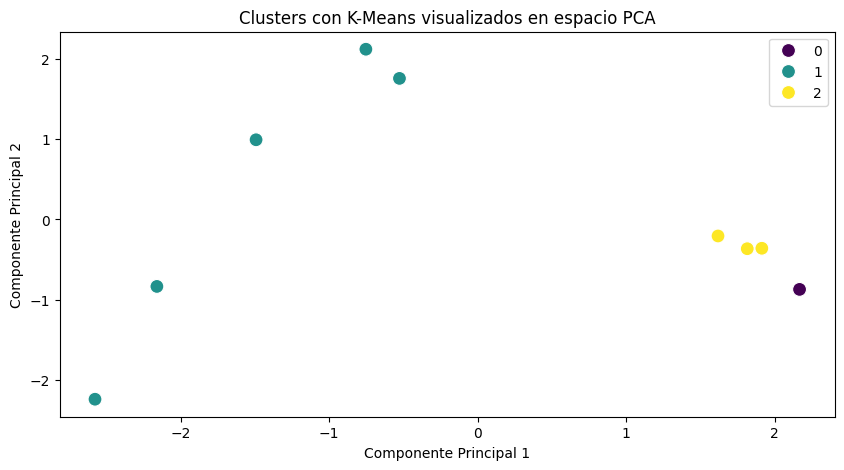

In [212]:

# ---------------------------
# Clustering: K-Means
# ---------------------------
from sklearn.cluster import KMeans

# Definimos K=3 (ajustable según análisis)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_clust_scaled)

print("\n[K-Means] Inercia:", kmeans.inertia_)
try:
    silhouette_kmeans = silhouette_score(X_clust_scaled, clusters_kmeans)
    print("[K-Means] Silhouette Score:", silhouette_kmeans)
except Exception as e:
    print("No se pudo calcular el Silhouette Score para K-Means:", e)

# Añadimos el cluster de K-Means al dataframe para análisis posterior
df['Cluster_KMeans'] = clusters_kmeans

# Visualización de los clusters utilizando los componentes del PCA
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=clusters_kmeans, palette="viridis", s=100)
plt.title("Clusters con K-Means visualizados en espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


[DBSCAN] Clusters obtenidos: [-1  0]
[DBSCAN] No se pudo calcular una métrica robusta (solo se detectó un único cluster sin contar el ruido).


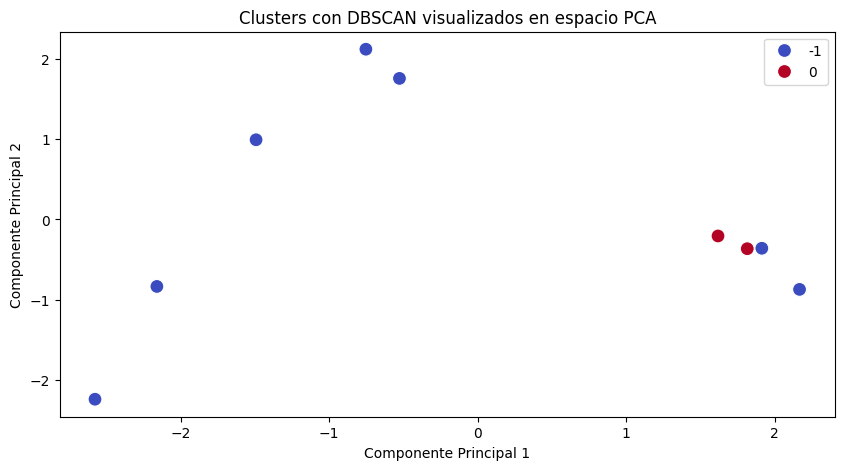

In [209]:

# ---------------------------
# Clustering: DBSCAN
# ---------------------------
from sklearn.cluster import DBSCAN

# Ajusta eps y min_samples según convenga para tus datos
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters_dbscan = dbscan.fit_predict(X_clust_scaled)
unique_clusters = np.unique(clusters_dbscan)
print("\n[DBSCAN] Clusters obtenidos:", unique_clusters)

# Calcular Silhouette Score solo si existen al menos dos clusters (excluyendo el ruido identificado como -1)
unique_clusters_no_noise = [label for label in unique_clusters if label != -1]
if len(unique_clusters_no_noise) < 2:
    print("[DBSCAN] No se pudo calcular una métrica robusta (solo se detectó un único cluster sin contar el ruido).")
else:
    # Aplicamos máscara para excluir el ruido (-1) al calcular la métrica
    mask = clusters_dbscan != -1
    silhouette_dbscan = silhouette_score(X_clust_scaled[mask], clusters_dbscan[mask])
    print("[DBSCAN] Silhouette Score (sin ruido):", silhouette_dbscan)

# Visualización de DBSCAN (señalando los clusters asignados)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=clusters_dbscan, palette="coolwarm", s=100)
plt.title("Clusters con DBSCAN visualizados en espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


In [ ]:
# ---------------------------
# Clustering: DBSCAN----------------------------------------------------
# ------------------------------------------------
# Guardamos el modelo de Random Forest para regresión
joblib.dump(rf_model, 'final_rf_model.pkl')
print("\n[Exportación] Modelo Random Forest Regression exportado en 'final_rf_model.pkl'.")

# Guardamos el pipeline completo del Árbol de Decisión para clasificación
joblib.dump(dt_pipeline, 'final_decision_tree_classifier.pkl')
print("[Exportación] Modelo Decision Tree Classifier exportado en 'final_decision_tree_classifier.pkl'.")



[Exportación] Modelo Random Forest Regression exportado en 'final_rf_model.pkl'.
[Exportación] Modelo Decision Tree Classifier exportado en 'final_decision_tree_classifier.pkl'.
